<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Banks have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another banking provider. It is important to understand which aspects of the service influence a customer's decision in leaving their existing banking provider. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

As a Data scientist with the bank need to build a neural network based classifier that can determine whether or not a customer will leave the bank in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not (0 = Does Not Have a Credit Card, 1 = Has a Credit Card).

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not (Active member in the sense, using bank products regularly, making transactions etc)

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [1]:
!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.12.0 xgboost==2.0.3 -q --user
!pip install --upgrade -q threadpoolctl

In [2]:
# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Libaries to help with data visualization

import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data

from sklearn.model_selection import train_test_split

# library to import to standardize the data

from sklearn.preprocessing import StandardScaler, LabelEncoder

# importing different functions to build models

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout

# importing SMOTE

from imblearn.over_sampling import SMOTE

# importing metrics

from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score

import random

# Library to avoid the warnings

import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [3]:
# Use the .read_csv function to load the dataset

churn = pd.read_csv("Churn.csv")

## Data Overview

In [4]:
# Use the .shape function to display the number of rows and columns present in the dataset

churn.shape 

(10000, 14)

#### Observations:

There are **10,000 rows** and **14 columns** present in the dataset.

In [5]:
# Create a copy of the dataset as a DataFrame to preserve quality of the original dataset

data = churn.copy()

In [6]:
# Use the .head function to view the first 5 rows of the DataFrame

data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Observations:



In [7]:
# Use the .tail function to view the final 5 rows of the DataFrame

data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


#### Observations:



In [8]:
# Use the .info function to generate an overview of the DataFrame

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


#### Observations:

The dataset contains 9 integer columns, 3 object columns, and 2 float columns.

In [9]:
# Use the .isnull function to detect missing values in DataFrame and use the sum function to total the missing values

missing_values = data.isnull().sum()
missing_values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### Observations:

The dataset posesses **no missing values.**

In [10]:
# Use the .describe function to generate a description of the data in our DataFrame

data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [11]:
# Use the .drop function to drop the "RowNumber," "CustomerId," and "Surname" columns containing unique values not relevant to analysis

data = data.drop(columns=['CustomerId','RowNumber','Surname'])

## Exploratory Data Analysis

### Univariate Analysis

In [141]:
# Function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="cornflowerblue"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [13]:
# Reusable function for labeled barplots

def labeled_barplot(data, feature, perc=False, n=None, palette="crest"):
    """
    Customized barplot with percentage at the top and customizable color palette.

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    palette: color palette (default is "coolwarm")
    """

    total = len(data[feature])  # Length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=45, fontsize=12)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette=palette,
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(100 * p.get_height() / total)
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
            color="blue"  # Changing the annotation text color
        )

    plt.xlabel("Category")  # Custom X-axis label
    plt.ylabel("Count")  # Custom Y-axis label
    plt.title("Bar Plot of " + feature)  # Custom plot title
    plt.show()

### Credit Score of Customer

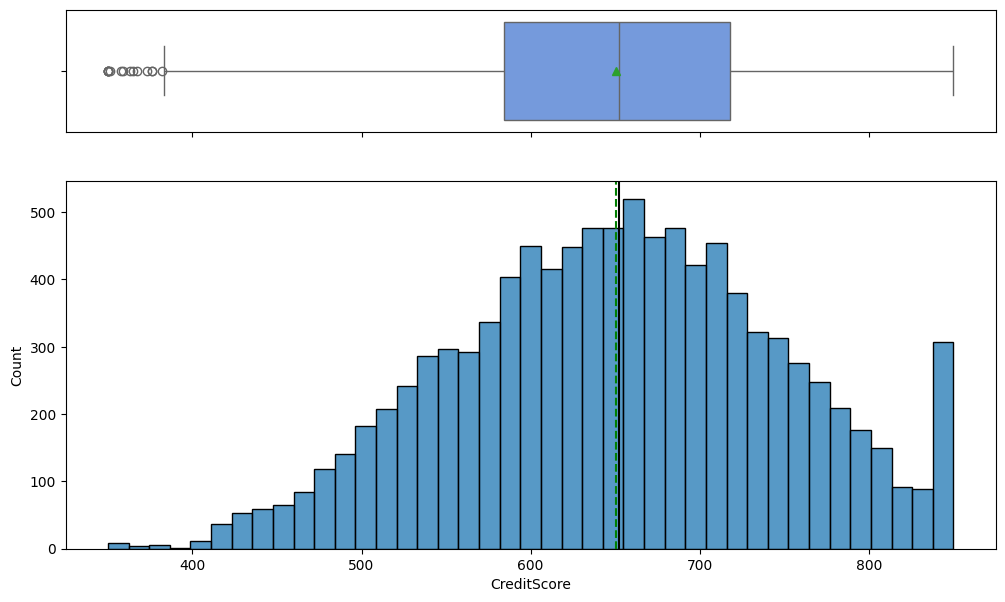

In [142]:
histogram_boxplot(data,'CreditScore')

#### Observations:

**Distribution:** The histogram shows a fairly normal distribution with a slight left skew. Most customers have credit scores around the central peak, which suggests a moderate creditworthiness among the bank's clientele.

**Outliers:** The box plot does not indicate significant outliers in the credit score data. The distribution is fairly consistent across the range.

### Age of Customer

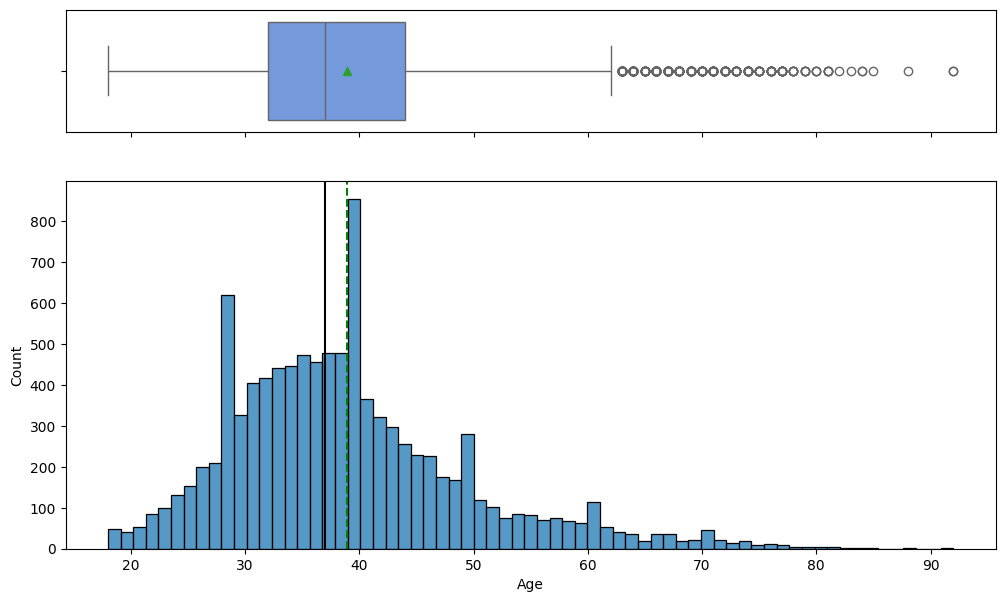

In [143]:
histogram_boxplot(data,'Age')

#### Observations:

**Distribution:** The histogram for Age shows a right-skewed distribution. Most customers are younger, with a significant number in their 30s to early 40s.

**Outliers:** The box plot for Age indicates the presence of outliers on the upper range, with some customers significantly older than the median age group.

### Total Balance of Customer

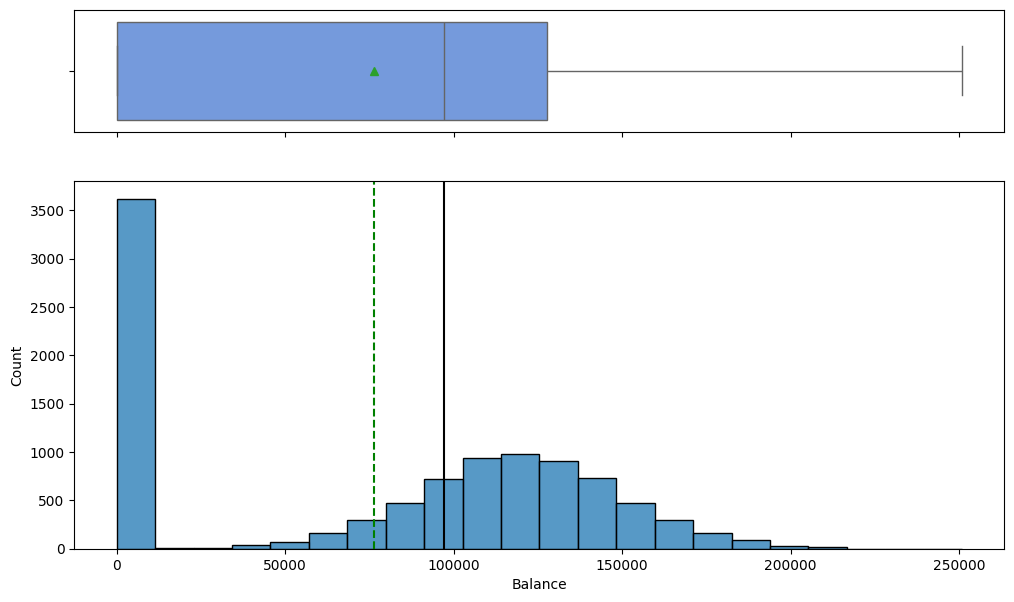

In [144]:
histogram_boxplot(data,'Balance')

#### Observations:

**Distribution:** The histogram for Balance shows a bimodal distribution. A substantial proportion of customers have a zero balance, which could indicate inactive accounts or new accounts. The other peak around the median suggests active accounts.

**Outliers:** The box plot doesn't show any significant outliers for Balance. The distribution is quite uniform for non-zero balances.

### Estimated Salary of Customer

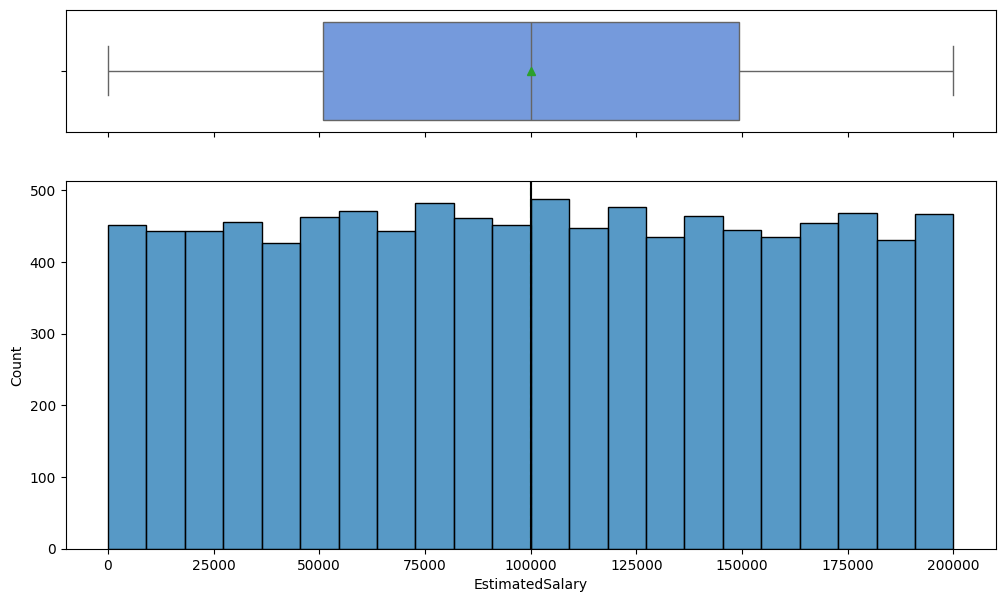

In [145]:
histogram_boxplot(data,'EstimatedSalary')

#### Observations:

**Distribution:** The histogram for estimated salary is quite uniform, showing an almost perfect uniform distribution across all salary ranges. This suggests that salary varies widely among the bank’s clientele without any specific concentration.

**Outliers:** There are no apparent outliers in the estimated salary data as per the box plot, and the data is evenly spread across the salary range.

### Customer Country of Residence

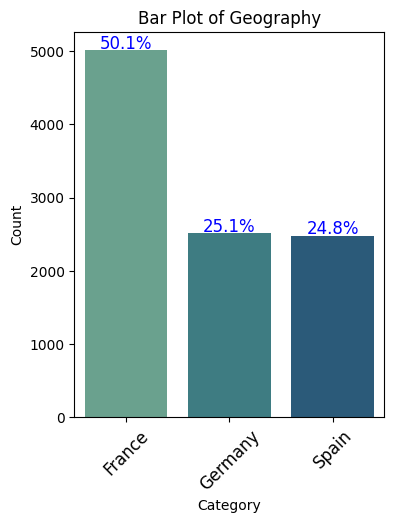

In [18]:
labeled_barplot(data, "Geography", perc=True)

#### Observations:

A majority of the customers are from France, followed by Spain and Germany. This indicates that **the bank's primary market is France.**

### Gender of Customer

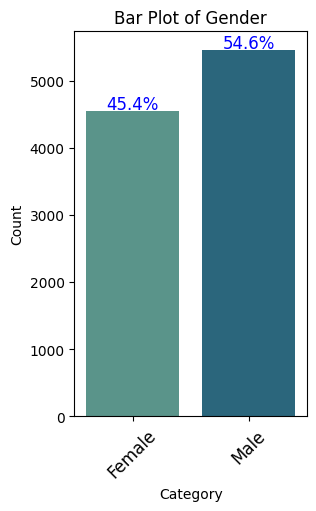

In [19]:
labeled_barplot(data, "Gender", perc=True)

#### Observations:

There is a relatively **balanced distribution between male and female customers**, with a slight dominance of male customers.

### Tenure of Customer

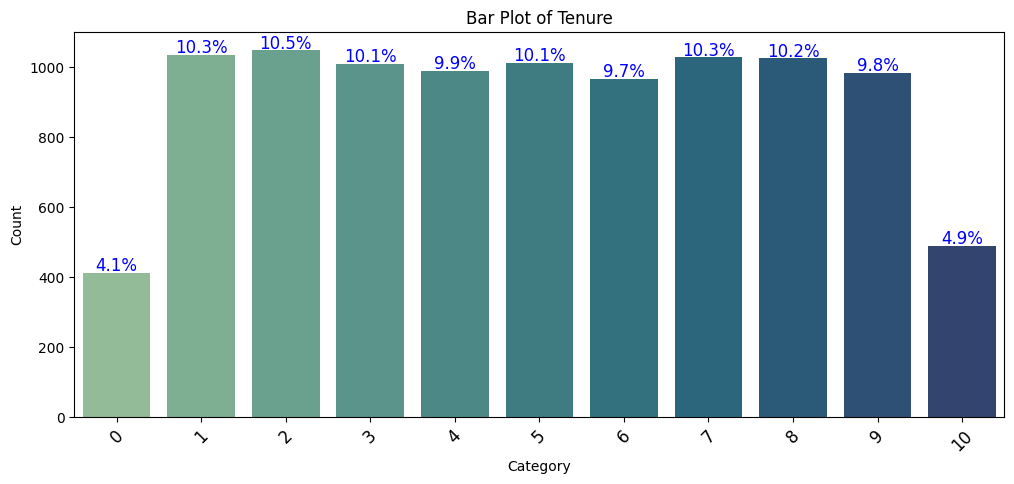

In [20]:
labeled_barplot(data, "Tenure", perc=True)

#### Observations:

Customers are fairly evenly distributed across different tenure lengths from 0 to 10 years. **This suggests a steady acquisition and retention of customers over time.**

### Number of Products Owned by Customer

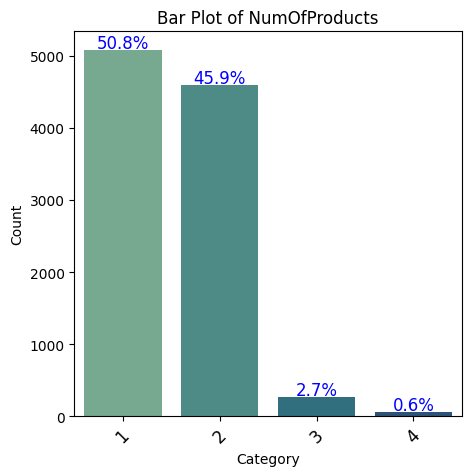

In [21]:
labeled_barplot(data, "NumOfProducts", perc=True)

#### Observations:

Most customers have 1 or 2 products from the bank. There are very few customers with 3 or 4 products, indicating that **most customers prefer a simpler banking setup.**

### Credit Card Ownership of Customer

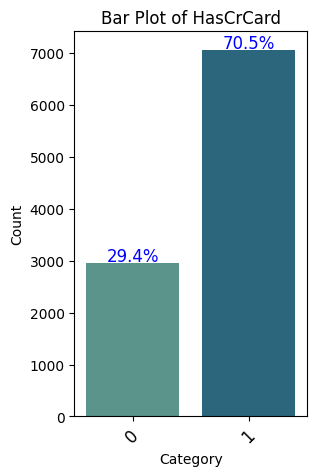

In [22]:
labeled_barplot(data, "HasCrCard", perc=True)

#### Observations:

A large proportion of the bank's customers have a credit card, showing that **credit cards are a popular product among the bank’s clientele.**

### Membership Status of Customer

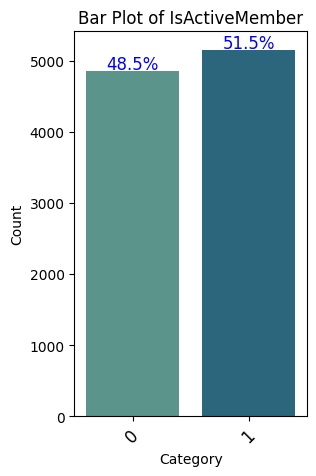

In [23]:
labeled_barplot(data, "IsActiveMember", perc=True)

#### Observations:

The **customers are nearly evenly split between active and inactive statuses**, though there's a **slight majority of active members.**

### Churn Status of Customer

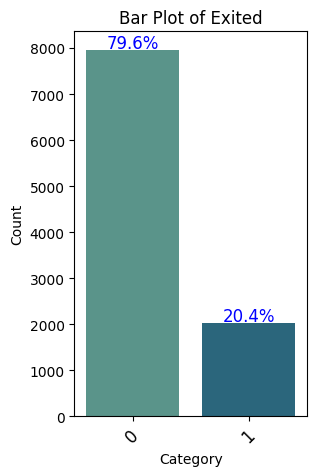

In [24]:
labeled_barplot(data, "Exited", perc=True)

#### Observations:

The majority of customers have not exited (churned), indicating a lower overall churn rate in the dataset. However, there is a significant minority of customers who have exited, showing that **churn is a notable concern for the bank.**

## Bivariate Analysis

### Correlation Check

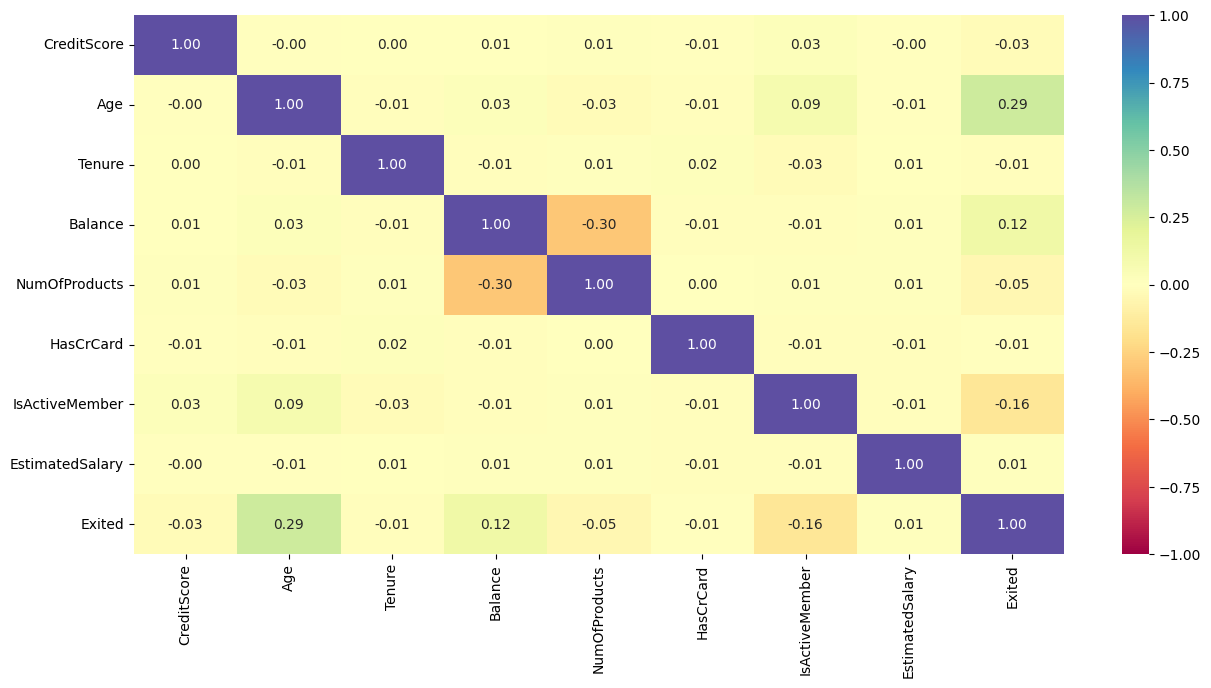

In [25]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### Churn Status vs Credit Score of Customer

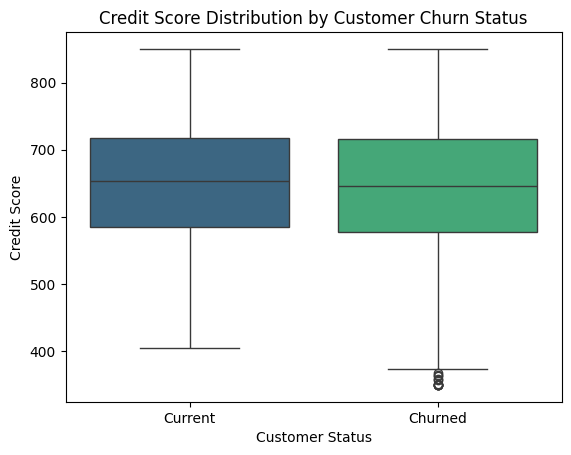

In [26]:
ax = sns.boxplot(x='Exited', y='CreditScore', data=data, palette='viridis')
ax.set_title('Credit Score Distribution by Customer Churn Status')
ax.set_xlabel('Customer Status')
ax.set_ylabel('Credit Score')
ax.set_xticklabels(['Current', 'Churned'])  

plt.show()

#### Observations:

**There doesn't appear to be a significant difference in the credit score distribution between customers who exited and those who did not.** Both groups show similar median credit scores and interquartile ranges. **This suggests that credit score alone might not be a strong indicator of churn.**

### Churn Status vs Age of Customer

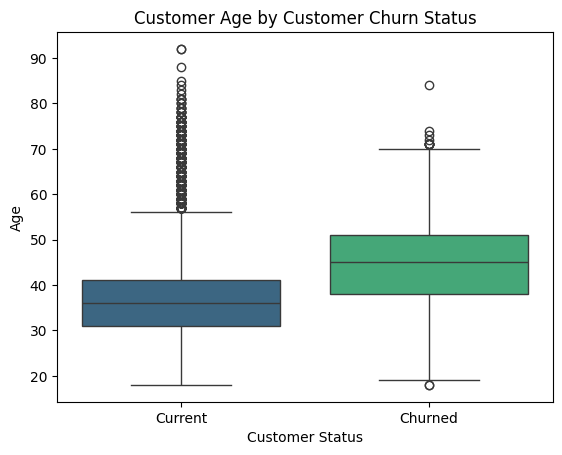

In [27]:
ax = sns.boxplot(x='Exited', y='Age', data=data, palette='viridis')
ax.set_title('Customer Age by Customer Churn Status')
ax.set_xlabel('Customer Status')
ax.set_ylabel('Age')
ax.set_xticklabels(['Current', 'Churned'])  

plt.show()

#### Observations: 

Age shows a notable difference between the two groups. **Customers who exited tend to be older than those who stayed.** The median age of churned customers is noticeably higher, and the age distribution is wider, indicating that **older customers are more likely to churn.**

### Churn Status vs Tenure of Customer

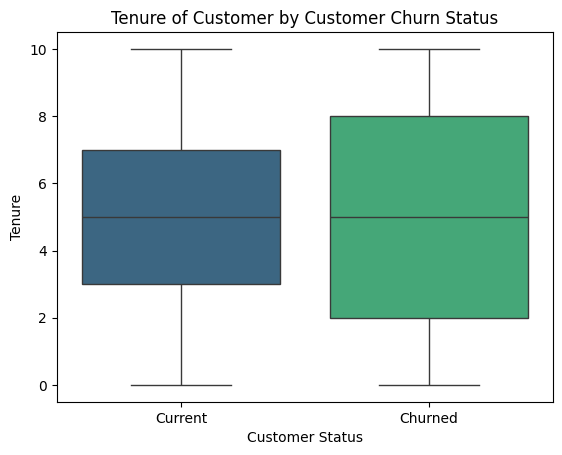

In [28]:
ax = sns.boxplot(x='Exited', y='Tenure', data=data, palette='viridis')
ax.set_title('Tenure of Customer by Customer Churn Status')
ax.set_xlabel('Customer Status')
ax.set_ylabel('Tenure')
ax.set_xticklabels(['Current', 'Churned'])

plt.show()

#### Observations: 

Tenure distributions are quite similar for both groups, although there is a slight indication that customers with very low tenure (close to 0 years) and very high tenure (close to 10 years) might be more likely to stay. The middle range of tenure shows less distinction in churn.

### Churn Status vs Account Balance of Customer (In Dollars)

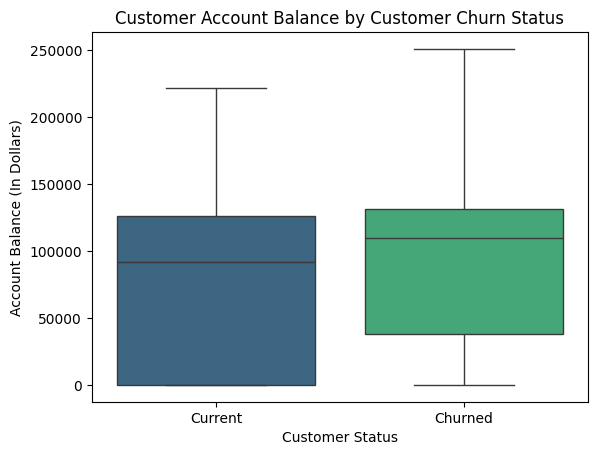

In [29]:
ax = sns.boxplot(x='Exited', y='Balance', data=data, palette='viridis')
ax.set_title('Customer Account Balance by Customer Churn Status')
ax.set_xlabel('Customer Status')
ax.set_ylabel('Account Balance (In Dollars)')
ax.set_xticklabels(['Current', 'Churned']) 

plt.show()

#### Observations: 

The balance shows a significant difference between the churned and non-churned customers. **Customers with higher balances are more likely to churn**, indicated by a higher median and a broader range in the balance for those who exited. **Customers with zero balance seem less likely to churn**, which is evident from the dense cluster at the balance of zero for non-churned customers.

### Churn Status vs Estimated Salary of Customer (In Dollars)

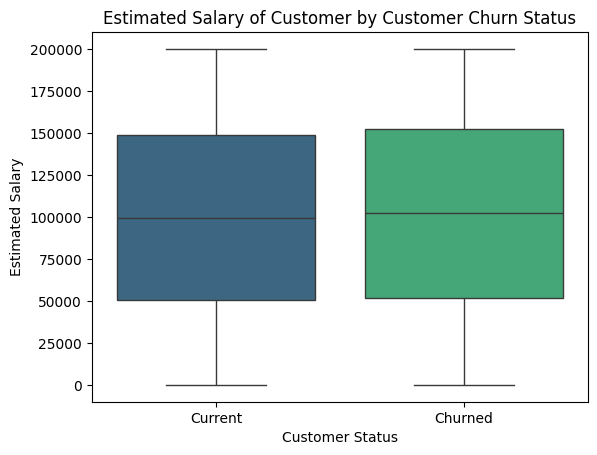

In [30]:
ax = sns.boxplot(x='Exited', y='EstimatedSalary', data=data, palette='viridis')
ax.set_title('Estimated Salary of Customer by Customer Churn Status')
ax.set_xlabel('Customer Status')
ax.set_ylabel('Estimated Salary')
ax.set_xticklabels(['Current', 'Churned'])  

plt.show()

#### Observations: 

There is no clear trend in estimated salary with respect to churn. Both groups show similar distributions in terms of median salary and spread, suggesting that **salary alone may not be a good predictor of churn.**

### Churn Status vs Customer Country of Residence

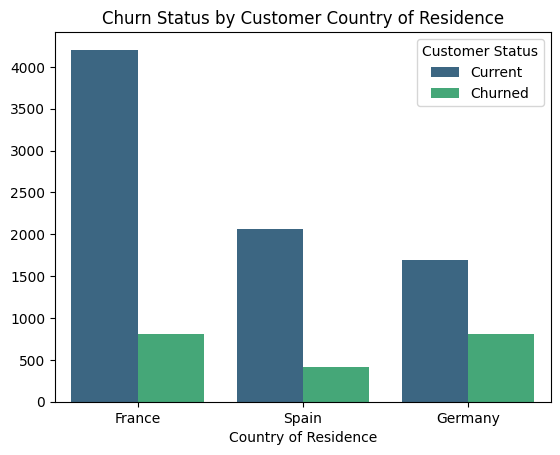

In [31]:
ax = sns.countplot(x='Geography', hue='Exited', data=data, palette='viridis')
ax.set_title('Churn Status by Customer Country of Residence')  # Setting the plot title
ax.set_xlabel('Country of Residence')  # Set the x-axis label
ax.set_ylabel('')  # Removing the y-axis label
ax.legend(title='Exited', loc='upper right')  # Adjusting the legend
ax.set_xticklabels(['France', 'Spain', 'Germany'])  # Custom labels for the x-axis
ax.legend(['Current', 'Churned'], title='Customer Status', loc='upper right')

plt.show()

#### Observations: 

The churn rate varies significantly across different geographical regions. **Customers from Germany have a notably higher churn rate compared to those from France and Spain**. This suggests that **regional factors or market conditions in Germany might be influencing customer satisfaction or preferences differently**.

### Churn Status vs Gender of Customer

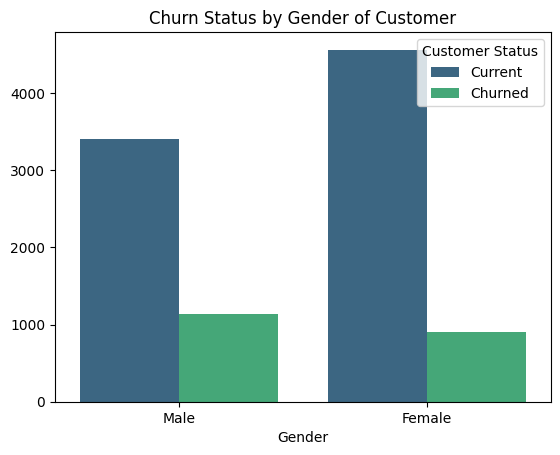

In [32]:
ax = sns.countplot(x='Gender', hue='Exited', data=data, palette='viridis')
ax.set_title('Churn Status by Gender of Customer')  
ax.set_xlabel('Gender')  
ax.set_ylabel('')  
ax.legend(title='Exited', loc='upper right')  
ax.set_xticklabels(['Male', 'Female']) 
ax.legend(['Current', 'Churned'], title='Customer Status', loc='upper right')

plt.show()

#### Observations: 

There is a **noticeable difference in churn rates between genders**. **Female customers have a higher churn rate compared to male customers**. This difference could be indicative of varying experiences or expectations between genders regarding the bank's services.

### Churn Status vs Number of Products Owned by Customer

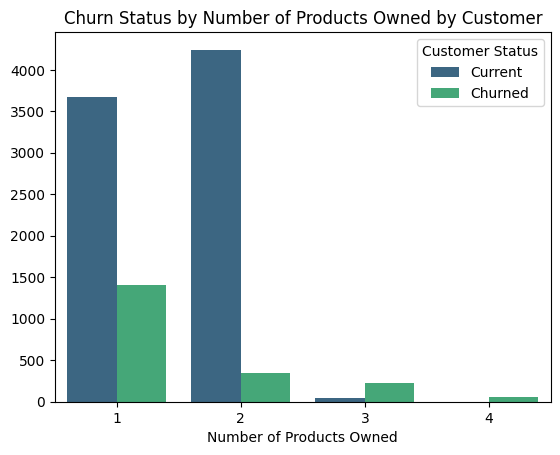

In [33]:
ax = sns.countplot(x='NumOfProducts', hue='Exited', data=data, palette='viridis')
ax.set_title('Churn Status by Number of Products Owned by Customer') 
ax.set_xlabel('Number of Products Owned') 
ax.set_ylabel('')  
ax.legend(title='Exited', loc='upper right')  
ax.legend(['Current', 'Churned'], title='Customer Status', loc='upper right')

plt.show()

#### Observations: 

The **number of products a customer has with the bank shows a strong correlation with churn**. **Customers with 1 or 2 products have lower churn rates compared to those with 3 or 4 products**. Particularly, **customers with 3 products have a very high churn rate**, suggesting possible issues with service complexity or product satisfaction.

### Churn Status vs Credit Card Ownership of Customer

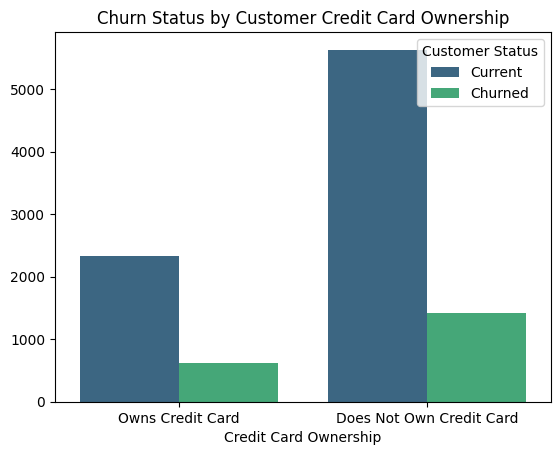

In [34]:
ax = sns.countplot(x='HasCrCard', hue='Exited', data=data, palette='viridis')
ax.set_title('Churn Status by Customer Credit Card Ownership')  
ax.set_xlabel('Credit Card Ownership')  
ax.set_ylabel('')  
ax.legend(title='Exited', loc='upper right')  
ax.set_xticklabels(['Owns Credit Card', 'Does Not Own Credit Card'])  
ax.legend(['Current', 'Churned'], title='Customer Status', loc='upper right')

plt.show()

#### Observations: 

There seems to be a slight difference in churn rates between customers who have a credit card and those who do not, but the difference is not as pronounced as other variables. **This indicates that merely possessing a credit card does not significantly influence the decision to leave the bank.**

### Churn Status vs Active / Inactive Customers

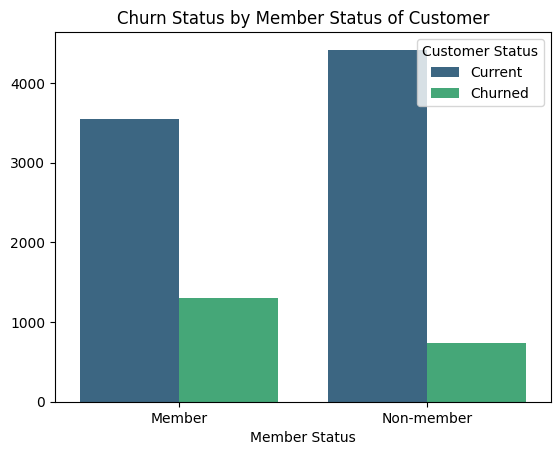

In [35]:
ax = sns.countplot(x='IsActiveMember', hue='Exited', data=data, palette='viridis')
ax.set_title('Churn Status by Member Status of Customer')  
ax.set_xlabel('Member Status')  
ax.set_ylabel('')  
ax.legend(title='Exited', loc='upper right')  
ax.set_xticklabels(['Member', 'Non-member'])  
ax.legend(['Current', 'Churned'], title='Customer Status', loc='upper right')

plt.show()

#### Observations: 

**Active membership status is strongly associated with churn.** Inactive members have a much higher churn rate compared to active members. This suggests that **engagement and regular interaction with the bank’s services are crucial in retaining customers.**

## Data Preprocessing

In [36]:
# One-Hot Encoding the 'Geography' variable

data_encoded = pd.get_dummies(data, columns=['Geography'], drop_first=True)

In [37]:
# Label Encoding the 'Gender' variable

data_encoded['Gender'] = np.where(data_encoded['Gender'] == 'Female', 0, 1)

In [38]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Gender             10000 non-null  int64  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int64  
 10  Geography_Germany  10000 non-null  uint8  
 11  Geography_Spain    10000 non-null  uint8  
dtypes: float64(2), int64(8), uint8(2)
memory usage: 800.9 KB


In [39]:
data_encoded.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [40]:
data_encoded.tail()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
9995,771,1,39,5,0.00,2,1,0,96270.64,0,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,1,0
9999,792,0,28,4,130142.79,1,1,0,38190.78,0,0,0


### Train-Validation-Test Split

In [41]:
# Separating features and label

X = data_encoded.drop('Exited', axis=1)
y = data_encoded['Exited']

# Splitting data into training and remaining data (85% for training, 15% remaining)

X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.15, random_state=1)

# Splitting remaining data into validation and test sets (50% each of remaining data)

X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=1)

# Checking the size of each dataset

X_train.shape, X_val.shape, X_test.shape

((8500, 11), (750, 11), (750, 11))

### Data Normalization

In [42]:
# Initialize the StandardScaler

scaler = StandardScaler()

# Fit the scaler to the training data and transform it

X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation to the validation and test sets

X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Check the first few rows of the scaled training data

print(X_train_scaled[:5])

[[ 0.13621598  0.91446691  0.68021863 -0.7073599  -1.22598638  0.8007532
  -1.54089419  0.97146575  1.327238   -0.58350885 -0.57445218]
 [-1.35340105 -1.09353328 -1.70590271 -1.39989148  1.20598952  2.5152122
   0.64897383  0.97146575  1.22062214  1.71377008 -0.57445218]
 [-1.88097374 -1.09353328  1.63466717  1.71650062 -1.22598638  2.5152122
  -1.54089419  0.97146575 -0.6534409  -0.58350885 -0.57445218]
 [ 0.1051823  -1.09353328  2.11189143 -0.01482832  1.27379659 -0.91370579
   0.64897383  0.97146575  1.01563404 -0.58350885  1.74078894]
 [-0.80513922  0.91446691 -1.515013   -1.05362569  0.8079648  -0.91370579
  -1.54089419  0.97146575 -0.57034893 -0.58350885  1.74078894]]


## Model Building

### Model Evaluation Criterion

- Given that the cost of failing to identify a customer who is likely to churn (false negative) could be higher than mistakenly identifying a customer as likely to churn (false positive), **focusing on recall is particularly important.** However, since excessive targeting of customers who are not at risk can also incur costs, maintaining a balance (as reflected by the F1-score and other metrics) could yield valuable insights.

In [43]:
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [44]:
train_metric_df = pd.DataFrame(columns=["recall"])
valid_metric_df = pd.DataFrame(columns=["recall"])

### Neural Network with SGD Optimizer

In [45]:
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime

np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [46]:
# Initializing the neural network

model_0 = Sequential()

# Input layer

model_0.add(Dense(11, activation='relu', input_dim = X_train.shape[1]))

# First hidden layer

model_0.add(Dense(64, activation='relu'))

# Second hidden layer

model_0.add(Dense(64, activation='relu'))

# Output layer

model_0.add(Dense(1, activation = 'sigmoid'))

In [47]:
# SGD as the optimizer

optimizer = tf.keras.optimizers.SGD(0.001)

metric = keras.metrics.Recall()

In [48]:
# Compile the model with binary cross entropy as loss function and recall as the metric

model_0.compile(optimizer=optimizer,
                loss='binary_crossentropy',  # Appropriate loss function for binary classification
                metrics=[metric])

In [49]:
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 64)                768       
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5125 (20.02 KB)
Trainable params: 5125 (20.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
# Train the model

history_0 = model_0.fit(X_train_scaled, y_train,
                      epochs=50,
                      batch_size=32,  
                      validation_data=(X_val_scaled, y_val),
                      verbose=1)

Epoch 1/50
266/266 [==============================] - 0s 671us/step - loss: 0.6819 - recall: 0.5260 - val_loss: 0.6485 - val_recall: 0.1579
Epoch 2/50
266/266 [==============================] - 0s 423us/step - loss: 0.6258 - recall: 0.0222 - val_loss: 0.6038 - val_recall: 0.0000e+00
Epoch 3/50
266/266 [==============================] - 0s 421us/step - loss: 0.5870 - recall: 0.0000e+00 - val_loss: 0.5726 - val_recall: 0.0000e+00
Epoch 4/50
266/266 [==============================] - 0s 402us/step - loss: 0.5597 - recall: 0.0000e+00 - val_loss: 0.5510 - val_recall: 0.0000e+00
Epoch 5/50
266/266 [==============================] - 0s 402us/step - loss: 0.5405 - recall: 0.0000e+00 - val_loss: 0.5359 - val_recall: 0.0000e+00
Epoch 6/50
266/266 [==============================] - 0s 377us/step - loss: 0.5270 - recall: 0.0000e+00 - val_loss: 0.5255 - val_recall: 0.0000e+00
Epoch 7/50
266/266 [==============================] - 0s 416us/step - loss: 0.5175 - recall: 0.0000e+00 - val_loss: 0.5179 -

#### Loss Function

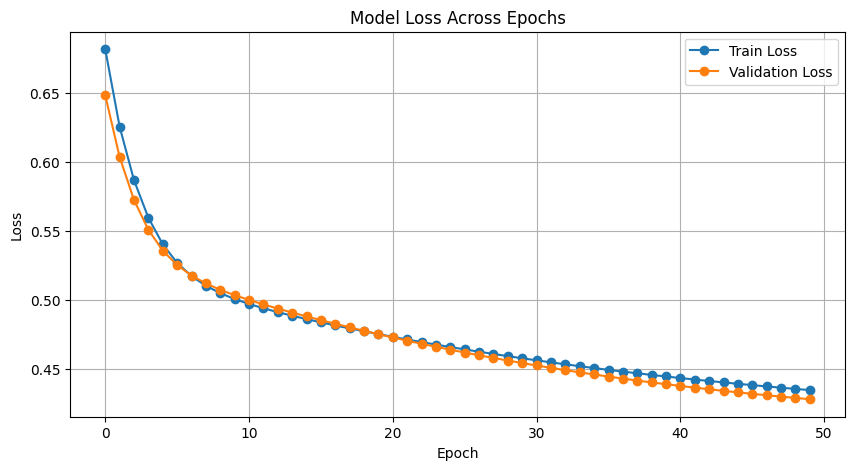

In [51]:
# Plotting Train Loss vs Validation Loss

plt.figure(figsize=(10, 5))
plt.plot(history_0.history['loss'], 'o-', label='Train Loss')
plt.plot(history_0.history['val_loss'], 'o-', label='Validation Loss')
plt.title('Model Loss Across Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

#### Recall

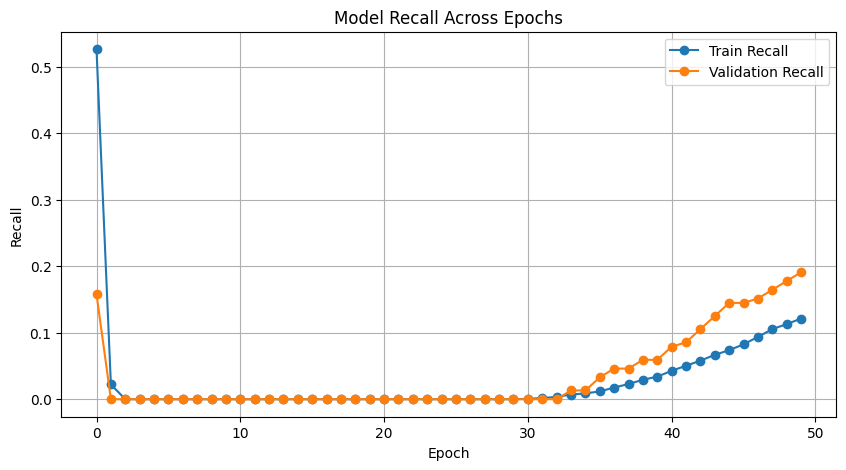

In [52]:
# Plotting Train Recall vs Validation Recall

plt.figure(figsize=(10, 5))
plt.plot(history_0.history['recall'], 'o-', label='Train Recall')
plt.plot(history_0.history['val_recall'], 'o-', label='Validation Recall')
plt.title('Model Recall Across Epochs')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [53]:
# Predicting the training data outcomes

y_train_pred = model_0.predict(X_train_scaled)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

266/266 [==============================] - 0s 264us/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [54]:
# Predicting the validation data outcomes

y_val_pred = model_0.predict(X_val_scaled)
y_val_pred = (y_val_pred > 0.5)  
y_val_pred

24/24 [==============================] - 0s 267us/step


array([[ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [55]:
model_name = "NN with SGD"

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

In [56]:
# Classification report

cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.99      0.89      6791
           1       0.72      0.13      0.21      1709

    accuracy                           0.81      8500
   macro avg       0.77      0.56      0.55      8500
weighted avg       0.80      0.81      0.76      8500



In [57]:
# Classification report

cr = classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.99      0.90       598
           1       0.83      0.19      0.31       152

    accuracy                           0.83       750
   macro avg       0.83      0.59      0.61       750
weighted avg       0.83      0.83      0.78       750



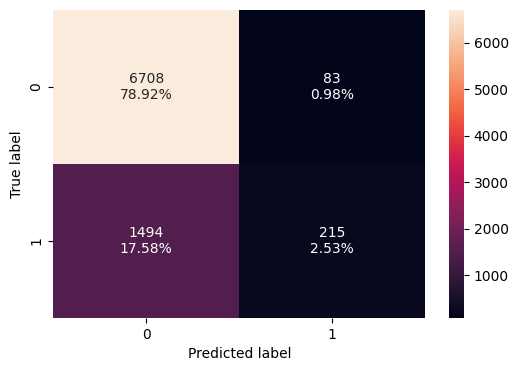

In [58]:
make_confusion_matrix(y_train, y_train_pred)

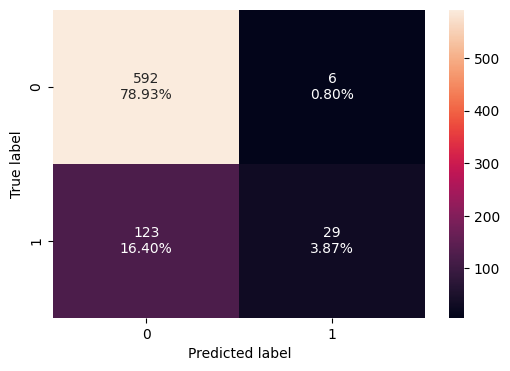

In [59]:
make_confusion_matrix(y_val, y_val_pred)

## Model Performance Improvement

### Neural Network with Adam Optimizer

In [60]:
backend.clear_session()

np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [61]:
# Initializing the neural network

model_1 = Sequential()

# Input layer

model_1.add(Dense(11, activation='relu', input_dim = X_train.shape[1]))

# First hidden layer

model_1.add(Dense(64, activation='relu'))

# Second hidden layer

model_1.add(Dense(32, activation='relu'))

# Output layer

model_1.add(Dense(1, activation = 'sigmoid'))

In [62]:
# Adam as the optimizer

optimizer = Adam(learning_rate=0.001)

metric = keras.metrics.Recall()

In [63]:
# Compile the model with binary cross entropy as loss function and recall as the metric

model_1.compile(optimizer=optimizer,
                loss='binary_crossentropy',  
                metrics=[metric])

In [64]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 64)                768       
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3013 (11.77 KB)
Trainable params: 3013 (11.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [65]:
# Train the model

history_1 = model_1.fit(X_train_scaled, y_train,
                      epochs=50,
                      batch_size=32,  
                      validation_data=(X_val_scaled, y_val),
                      verbose=1)

Epoch 1/50
266/266 [==============================] - 0s 639us/step - loss: 0.4585 - recall: 0.1568 - val_loss: 0.4101 - val_recall: 0.2697
Epoch 2/50
266/266 [==============================] - 0s 390us/step - loss: 0.4003 - recall: 0.3388 - val_loss: 0.3828 - val_recall: 0.3026
Epoch 3/50
266/266 [==============================] - 0s 451us/step - loss: 0.3745 - recall: 0.4154 - val_loss: 0.3613 - val_recall: 0.3882
Epoch 4/50
266/266 [==============================] - 0s 450us/step - loss: 0.3576 - recall: 0.4400 - val_loss: 0.3469 - val_recall: 0.4079
Epoch 5/50
266/266 [==============================] - 0s 440us/step - loss: 0.3496 - recall: 0.4593 - val_loss: 0.3351 - val_recall: 0.4539
Epoch 6/50
266/266 [==============================] - 0s 446us/step - loss: 0.3447 - recall: 0.4675 - val_loss: 0.3321 - val_recall: 0.4737
Epoch 7/50
266/266 [==============================] - 0s 446us/step - loss: 0.3400 - recall: 0.4716 - val_loss: 0.3370 - val_recall: 0.4474
Epoch 8/50
266/266 [

#### Loss Function

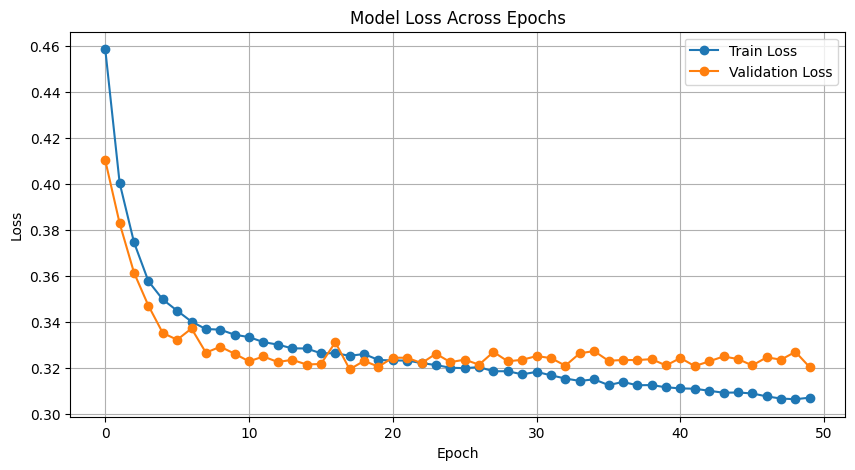

In [66]:
plt.figure(figsize=(10, 5))
plt.plot(history_1.history['loss'], 'o-', label='Train Loss')
plt.plot(history_1.history['val_loss'], 'o-', label='Validation Loss')
plt.title('Model Loss Across Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

#### Recall

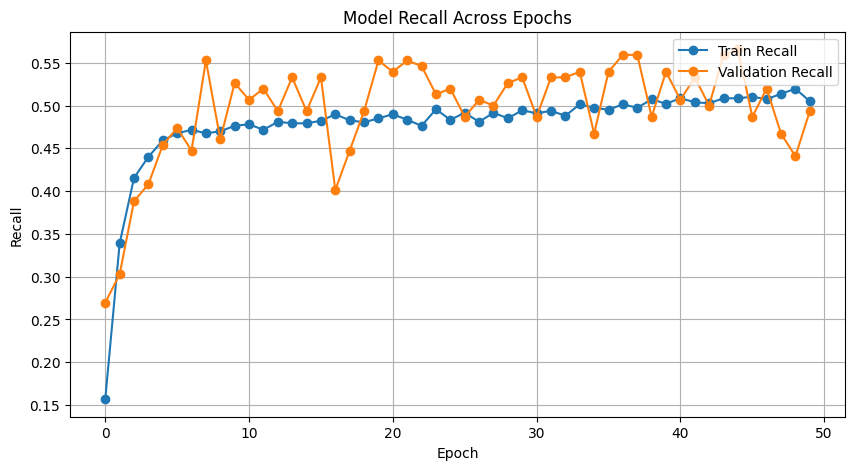

In [67]:
plt.figure(figsize=(10, 5))
plt.plot(history_1.history['recall'], 'o-', label='Train Recall')
plt.plot(history_1.history['val_recall'], 'o-', label='Validation Recall')
plt.title('Model Recall Across Epochs')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [68]:
# Predicting the training data outcomes

y_train_pred = model_1.predict(X_train_scaled)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

266/266 [==============================] - 0s 262us/step


array([[False],
       [False],
       [ True],
       ...,
       [ True],
       [False],
       [False]])

In [69]:
# Predicting the validation data outcomes

y_val_pred = model_1.predict(X_val_scaled)
y_val_pred = (y_val_pred > 0.5)  
y_val_pred

24/24 [==============================] - 0s 285us/step


array([[ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [

In [70]:
model_name = "NN with Adam"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

#### Classification Report

In [71]:
# Classification report

cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.97      0.93      6791
           1       0.81      0.49      0.61      1709

    accuracy                           0.87      8500
   macro avg       0.85      0.73      0.77      8500
weighted avg       0.87      0.87      0.86      8500



In [72]:
# Classification report

cr = classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       598
           1       0.81      0.49      0.61       152

    accuracy                           0.87       750
   macro avg       0.84      0.73      0.77       750
weighted avg       0.87      0.87      0.86       750



#### Confusion Matrix

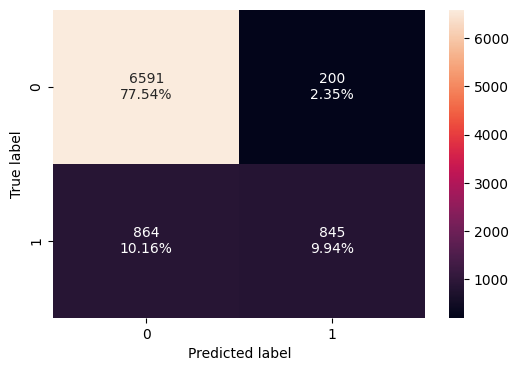

In [73]:
make_confusion_matrix(y_train, y_train_pred)

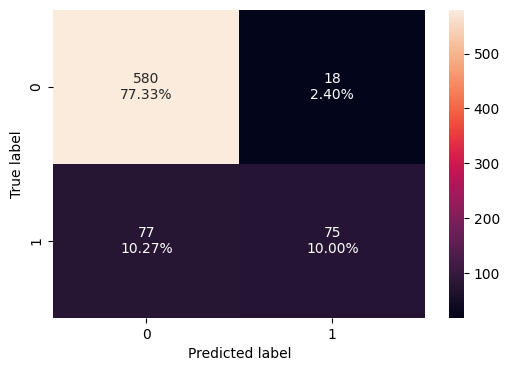

In [74]:
make_confusion_matrix(y_val, y_val_pred)

### Neural Network with Adam Optimizer and Dropout

In [75]:
backend.clear_session()

np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [76]:
# Initializing the neural network

model_2 = Sequential()

# Input layer 

model_2.add(Dense(11, activation='relu', input_dim = X_train.shape[1]))

# Dropout of 0.2 for input layer

model_2.add(Dropout(0.2))

# First hidden layer

model_2.add(Dense(128, activation='relu'))

# Second hidden layer

model_2.add(Dense(64, activation='relu'))

# Dropout of 0.2 after second hidden layer

model_2.add(Dropout(0.2))

# Third hidden layer

model_2.add(Dense(32, activation='relu'))

# Output layer

model_2.add(Dense(1, activation = 'sigmoid'))

In [77]:
# Adam as the optimizer

optimizer = Adam(learning_rate=0.001)

metric = keras.metrics.Recall()

In [78]:
# Compile the model with binary cross entropy as loss function and recall as the metric

model_2.compile(optimizer=optimizer,
                loss='binary_crossentropy', 
                metrics=[metric])

In [79]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dropout (Dropout)           (None, 11)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               1536      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 3

In [80]:
# Train the model

history_2 = model_2.fit(X_train_scaled, y_train,
                      epochs=100,
                      batch_size=32,  
                      validation_data=(X_val_scaled, y_val),
                      verbose=1)

Epoch 1/100
266/266 [==============================] - 0s 800us/step - loss: 0.4720 - recall: 0.1293 - val_loss: 0.4160 - val_recall: 0.2171
Epoch 2/100
266/266 [==============================] - 0s 511us/step - loss: 0.4363 - recall: 0.2264 - val_loss: 0.4019 - val_recall: 0.1776
Epoch 3/100
266/266 [==============================] - 0s 445us/step - loss: 0.4154 - recall: 0.3049 - val_loss: 0.3764 - val_recall: 0.2763
Epoch 4/100
266/266 [==============================] - 0s 445us/step - loss: 0.4004 - recall: 0.3253 - val_loss: 0.3610 - val_recall: 0.3618
Epoch 5/100
266/266 [==============================] - 0s 450us/step - loss: 0.3903 - recall: 0.3552 - val_loss: 0.3522 - val_recall: 0.3684
Epoch 6/100
266/266 [==============================] - 0s 446us/step - loss: 0.3832 - recall: 0.3815 - val_loss: 0.3457 - val_recall: 0.3618
Epoch 7/100
266/266 [==============================] - 0s 452us/step - loss: 0.3759 - recall: 0.3839 - val_loss: 0.3533 - val_recall: 0.3092
Epoch 8/100
2

Epoch 59/100
266/266 [==============================] - 0s 450us/step - loss: 0.3355 - recall: 0.4529 - val_loss: 0.3321 - val_recall: 0.4276
Epoch 60/100
266/266 [==============================] - 0s 448us/step - loss: 0.3346 - recall: 0.4453 - val_loss: 0.3335 - val_recall: 0.4145
Epoch 61/100
266/266 [==============================] - 0s 436us/step - loss: 0.3331 - recall: 0.4394 - val_loss: 0.3335 - val_recall: 0.3947
Epoch 62/100
266/266 [==============================] - 0s 438us/step - loss: 0.3369 - recall: 0.4429 - val_loss: 0.3323 - val_recall: 0.3882
Epoch 63/100
266/266 [==============================] - 0s 436us/step - loss: 0.3365 - recall: 0.4494 - val_loss: 0.3306 - val_recall: 0.4408
Epoch 64/100
266/266 [==============================] - 0s 433us/step - loss: 0.3355 - recall: 0.4687 - val_loss: 0.3336 - val_recall: 0.3947
Epoch 65/100
266/266 [==============================] - 0s 457us/step - loss: 0.3325 - recall: 0.4634 - val_loss: 0.3324 - val_recall: 0.4211
Epoch 

#### Loss Function

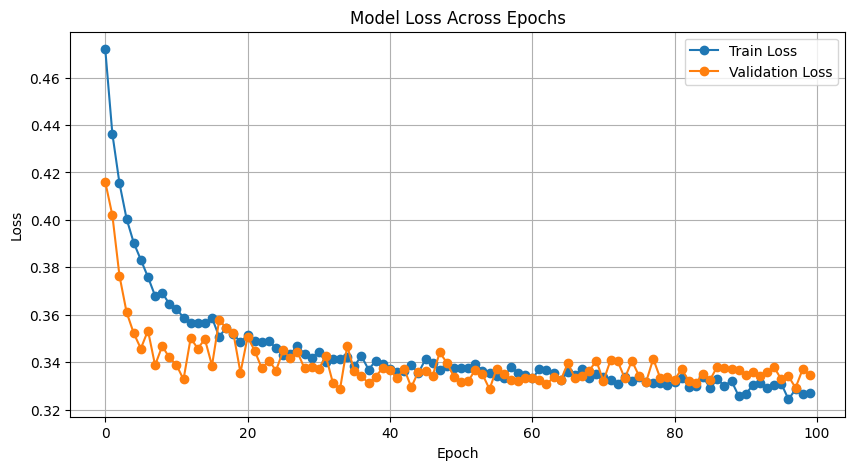

In [81]:
plt.figure(figsize=(10, 5))
plt.plot(history_2.history['loss'], 'o-', label='Train Loss')
plt.plot(history_2.history['val_loss'], 'o-', label='Validation Loss')
plt.title('Model Loss Across Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

#### Recall

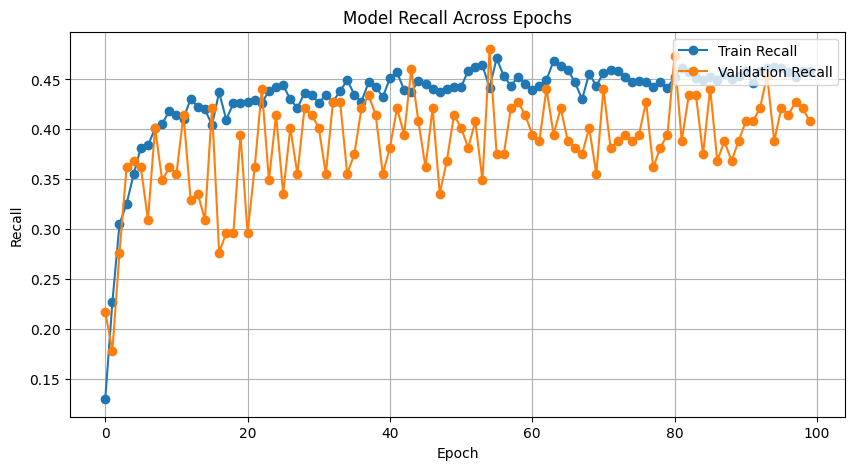

In [82]:
plt.figure(figsize=(10, 5))
plt.plot(history_2.history['recall'], 'o-', label='Train Recall')
plt.plot(history_2.history['val_recall'], 'o-', label='Validation Recall')
plt.title('Model Recall Across Epochs')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [83]:
# Predicting the training data outcomes

y_train_pred = model_2.predict(X_train_scaled)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

266/266 [==============================] - 0s 275us/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [84]:
# Predicting the validation data outcomes

y_val_pred = model_2.predict(X_val_scaled)
y_val_pred = (y_val_pred > 0.5)  
y_val_pred

24/24 [==============================] - 0s 280us/step


array([[ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [

In [85]:
model_name = "NN with Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

#### Classification Report

In [86]:
# Classification report

cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      6791
           1       0.88      0.37      0.52      1709

    accuracy                           0.86      8500
   macro avg       0.87      0.68      0.72      8500
weighted avg       0.87      0.86      0.84      8500



In [87]:
# Classification report

cr = classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       598
           1       0.85      0.41      0.55       152

    accuracy                           0.87       750
   macro avg       0.86      0.69      0.74       750
weighted avg       0.86      0.87      0.85       750



#### Confusion Matrix

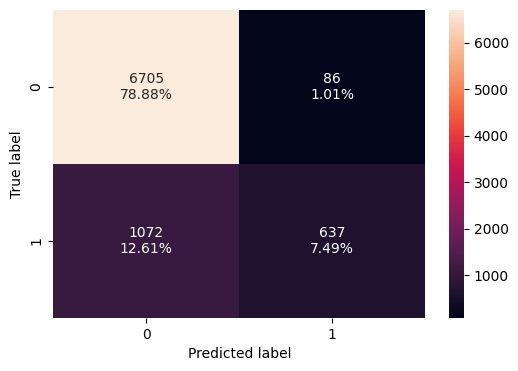

In [88]:
make_confusion_matrix(y_train, y_train_pred)

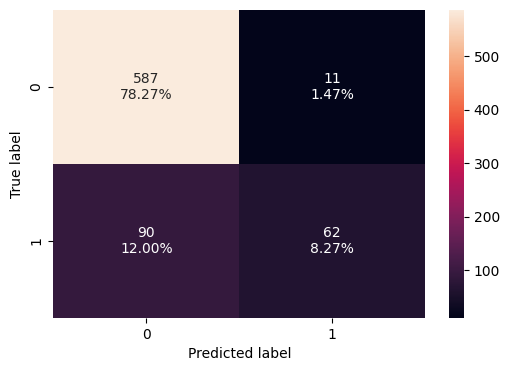

In [89]:
make_confusion_matrix(y_val, y_val_pred)

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [90]:
sm = SMOTE(random_state=1)

X_train_smote, y_train_smote= sm.fit_resample(X_train, y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

After UpSampling, the shape of train_X: (13582, 11)
After UpSampling, the shape of train_y: (13582,) 



In [91]:
backend.clear_session()

np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [92]:
# Initializing the neural network

model_3 = Sequential()

# Input layer 

model_3.add(Dense(11, activation='relu', input_dim = X_train_smote.shape[1]))

# First hidden layer

model_3.add(Dense(64, activation='relu'))

# Second hidden layer

model_3.add(Dense(64, activation='relu'))

# Output layer

model_3.add(Dense(1, activation = 'sigmoid'))

In [93]:
# SGD as the optimizer

optimizer = tf.keras.optimizers.SGD(0.001)

metric = keras.metrics.Recall()

In [94]:
# Compile the model with binary cross entropy as loss function and recall as the metric

model_3.compile(optimizer=optimizer,
                loss='binary_crossentropy', 
                metrics=[metric])

In [95]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 64)                768       
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5125 (20.02 KB)
Trainable params: 5125 (20.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [96]:
# Train the model

history_3 = model_3.fit(
    X_train_smote, y_train_smote,
    batch_size=32, 
    epochs=50, 
    verbose=1,
    validation_data = (X_val,y_val)
)

Epoch 1/50
425/425 [==============================] - 0s 486us/step - loss: 75080.8984 - recall: 0.0081 - val_loss: 0.6620 - val_recall: 0.0000e+00
Epoch 2/50
425/425 [==============================] - 0s 329us/step - loss: 0.6938 - recall: 0.0000e+00 - val_loss: 0.6822 - val_recall: 0.0000e+00
Epoch 3/50
425/425 [==============================] - 0s 330us/step - loss: 0.6933 - recall: 0.0000e+00 - val_loss: 0.6890 - val_recall: 0.0000e+00
Epoch 4/50
425/425 [==============================] - 0s 328us/step - loss: 0.6932 - recall: 0.0689 - val_loss: 0.6922 - val_recall: 0.0000e+00
Epoch 5/50
425/425 [==============================] - 0s 326us/step - loss: 0.6932 - recall: 0.4494 - val_loss: 0.6923 - val_recall: 0.0000e+00
Epoch 6/50
425/425 [==============================] - 0s 327us/step - loss: 0.6932 - recall: 0.4625 - val_loss: 0.6920 - val_recall: 0.0000e+00
Epoch 7/50
425/425 [==============================] - 0s 326us/step - loss: 0.6932 - recall: 0.1530 - val_loss: 0.6957 - val

#### Loss Function

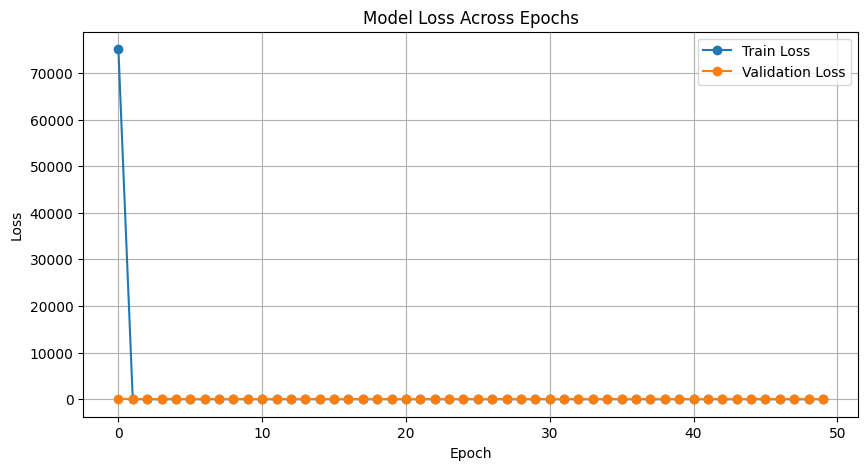

In [97]:
plt.figure(figsize=(10, 5))
plt.plot(history_3.history['loss'], 'o-', label='Train Loss')
plt.plot(history_3.history['val_loss'], 'o-', label='Validation Loss')
plt.title('Model Loss Across Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

#### Recall

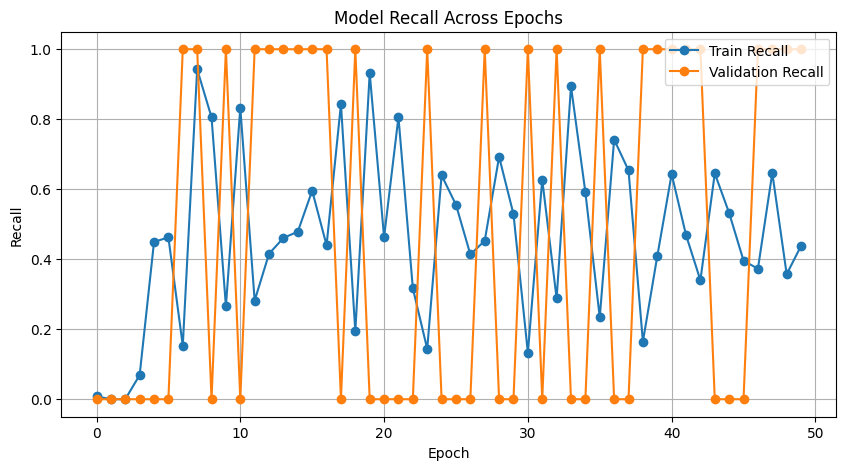

In [98]:
plt.figure(figsize=(10, 5))
plt.plot(history_3.history['recall'], 'o-', label='Train Recall')
plt.plot(history_3.history['val_recall'], 'o-', label='Validation Recall')
plt.title('Model Recall Across Epochs')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [99]:
y_train_pred = model_3.predict(X_train_smote)

# Predicting the training data outcomes using 0.5 as the threshold

y_train_pred = (y_train_pred > 0.5)
y_train_pred

425/425 [==============================] - 0s 258us/step


array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [100]:
y_val_pred = model_3.predict(X_val)

# Predicting the validation data outcomes using 0.5 as the threshold

y_val_pred = (y_val_pred > 0.5)
y_val_pred

24/24 [==============================] - 0s 274us/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [101]:
model_name = "NN with SMOTE & SGD"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

#### Classification Report

In [102]:
# Classification report

cr = classification_report(y_train_smote, y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6791
           1       0.50      1.00      0.67      6791

    accuracy                           0.50     13582
   macro avg       0.25      0.50      0.33     13582
weighted avg       0.25      0.50      0.33     13582



In [103]:
# Classification report

cr = classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       598
           1       0.20      1.00      0.34       152

    accuracy                           0.20       750
   macro avg       0.10      0.50      0.17       750
weighted avg       0.04      0.20      0.07       750



#### Confusion Matrix

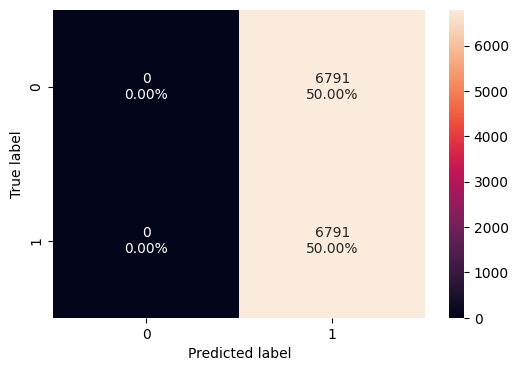

In [104]:
make_confusion_matrix(y_train_smote, y_train_pred)

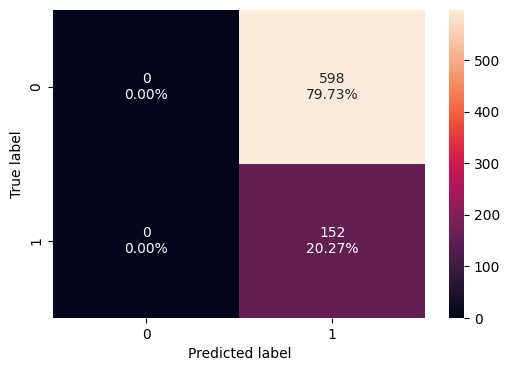

In [105]:
make_confusion_matrix(y_val, y_val_pred)

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [106]:
backend.clear_session()

np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [107]:
# Initializing the model

model_4 = Sequential()

# Input layer

model_4.add(Dense(11, activation='relu', input_dim = X_train_smote.shape[1]))

# First hidden layer

model_4.add(Dense(128,activation='relu'))

# Second hidden layer

model_4.add(Dense(64,activation='relu'))

# Output layer

model_4.add(Dense(1, activation = 'sigmoid'))

In [108]:
# Adam as the optimizer

optimizer = Adam(learning_rate=0.001)

metric = keras.metrics.Recall()

In [109]:
# Compile the model with binary cross entropy as loss function and recall as the metric

model_4.compile(optimizer=optimizer,
                loss='binary_crossentropy', 
                metrics=[metric])

In [110]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 128)               1536      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9989 (39.02 KB)
Trainable params: 9989 (39.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [111]:
# Train the model

history_4 = model_4.fit(
    X_train_smote, y_train_smote,
    batch_size=32, 
    epochs=50, 
    verbose=1,
    validation_data = (X_val,y_val)
)

Epoch 1/50
425/425 [==============================] - 0s 535us/step - loss: 148.6322 - recall: 0.5141 - val_loss: 38.8496 - val_recall: 0.3684
Epoch 2/50
425/425 [==============================] - 0s 380us/step - loss: 100.9821 - recall: 0.5258 - val_loss: 34.3794 - val_recall: 0.3421
Epoch 3/50
425/425 [==============================] - 0s 379us/step - loss: 63.3322 - recall: 0.5076 - val_loss: 28.2649 - val_recall: 0.1579
Epoch 4/50
425/425 [==============================] - 0s 393us/step - loss: 63.5273 - recall: 0.5077 - val_loss: 151.8301 - val_recall: 0.8816
Epoch 5/50
425/425 [==============================] - 0s 376us/step - loss: 40.2443 - recall: 0.5088 - val_loss: 10.7596 - val_recall: 0.1974
Epoch 6/50
425/425 [==============================] - 0s 380us/step - loss: 33.8308 - recall: 0.5174 - val_loss: 16.1938 - val_recall: 0.1118
Epoch 7/50
425/425 [==============================] - 0s 390us/step - loss: 30.1469 - recall: 0.5133 - val_loss: 10.9861 - val_recall: 0.9342
Epo

#### Loss Function

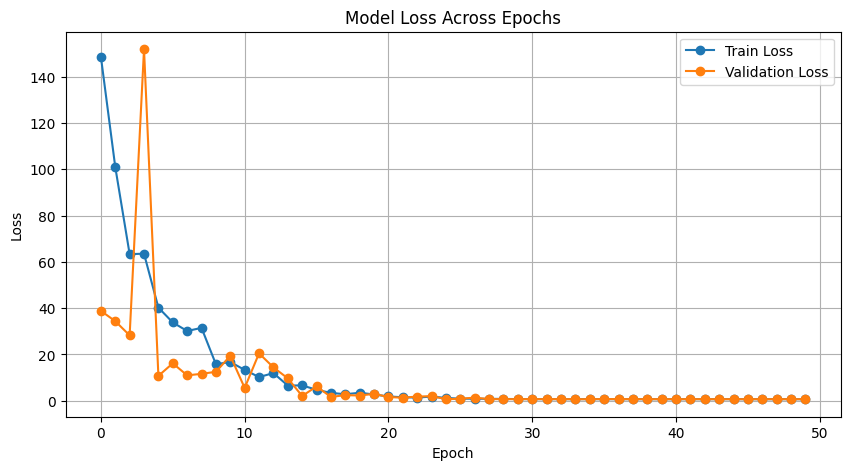

In [112]:
plt.figure(figsize=(10, 5))
plt.plot(history_4.history['loss'], 'o-', label='Train Loss')
plt.plot(history_4.history['val_loss'], 'o-', label='Validation Loss')
plt.title('Model Loss Across Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

#### Recall

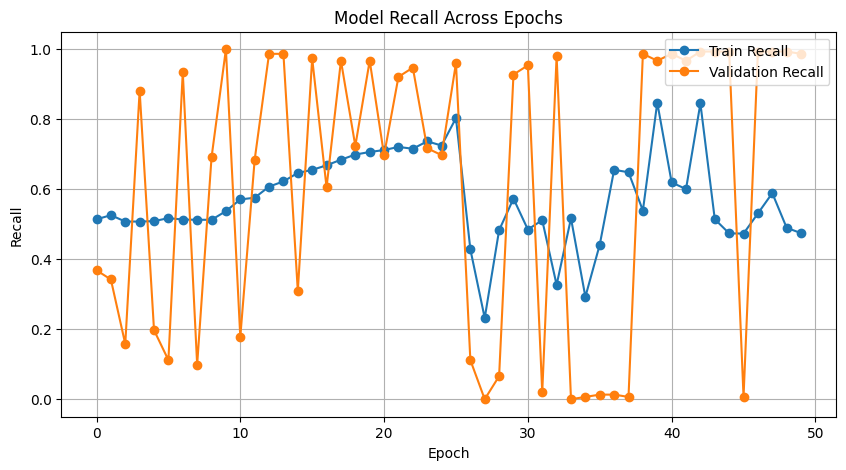

In [113]:
plt.figure(figsize=(10, 5))
plt.plot(history_4.history['recall'], 'o-', label='Train Recall')
plt.plot(history_4.history['val_recall'], 'o-', label='Validation Recall')
plt.title('Model Recall Across Epochs')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [114]:
y_train_pred = model_4.predict(X_train_smote)

# Predicting the results using 0.5 as the threshold

y_train_pred = (y_train_pred > 0.5)
y_train_pred

425/425 [==============================] - 0s 260us/step


array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [115]:
y_val_pred = model_4.predict(X_val)

# Predicting the results using 0.5 as the threshold

y_val_pred = (y_val_pred > 0.5)
y_val_pred

24/24 [==============================] - 0s 298us/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

#### Classification Report

In [116]:
# Classification report

cr = classification_report(y_train_smote, y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.73      0.01      0.03      6791
           1       0.50      1.00      0.67      6791

    accuracy                           0.50     13582
   macro avg       0.62      0.50      0.35     13582
weighted avg       0.62      0.50      0.35     13582



In [117]:
# Classification report

cr = classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.02      0.03       598
           1       0.20      0.99      0.34       152

    accuracy                           0.21       750
   macro avg       0.51      0.50      0.18       750
weighted avg       0.69      0.21      0.09       750



#### Confusion Matrix

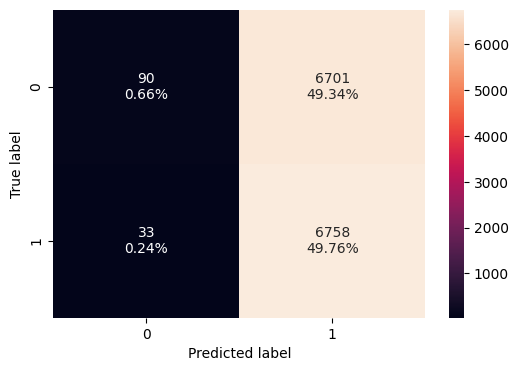

In [118]:
make_confusion_matrix(y_train_smote, y_train_pred)

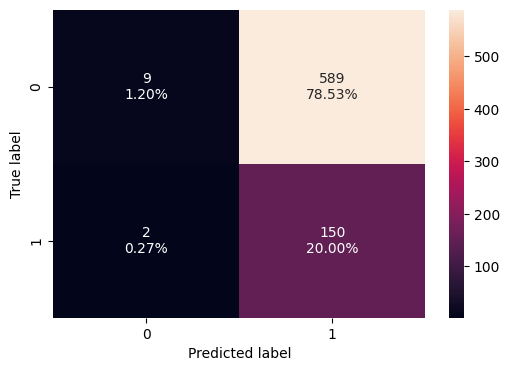

In [119]:
make_confusion_matrix(y_val, y_val_pred)

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [120]:
backend.clear_session()

np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [121]:
# Initializing the model

model_5 = Sequential()

# Input layer

model_5.add(Dense(11, activation='relu', input_dim = X_train_smote.shape[1]))

# Dropout rate of 0.2 on input layer

model_5.add(Dropout(0.2))

# First hidden layer

model_5.add(Dense(128,activation='relu'))

# Dropout rate of 0.2 on first hidden layer

model_5.add(Dropout(0.2))

# Second hidden layer

model_5.add(Dense(64,activation='relu'))

# Output layer

model_5.add(Dense(1, activation = 'sigmoid'))

In [122]:
# Adam as the optimizer

optimizer = Adam(learning_rate=0.001)

metric = keras.metrics.Recall()

In [123]:
# Compile the model with binary cross entropy as loss function and recall as the metric

model_5.compile(optimizer=optimizer,
                loss='binary_crossentropy', 
                metrics=[metric])

In [124]:
model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dropout (Dropout)           (None, 11)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               1536      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9989 (39.02 KB)
Trainable params: 9989 (39

In [125]:
history_5 = model_5.fit(
    X_train_smote,y_train_smote,
    batch_size=32, 
    epochs=50,
    verbose=1,
    validation_data = (X_val,y_val))

Epoch 1/50
425/425 [==============================] - 0s 562us/step - loss: 399.5362 - recall: 0.5145 - val_loss: 78.0804 - val_recall: 0.6711
Epoch 2/50
425/425 [==============================] - 0s 424us/step - loss: 72.5640 - recall: 0.4764 - val_loss: 6.1704 - val_recall: 0.6184
Epoch 3/50
425/425 [==============================] - 0s 423us/step - loss: 29.7592 - recall: 0.7258 - val_loss: 4.2712 - val_recall: 0.6513
Epoch 4/50
425/425 [==============================] - 0s 421us/step - loss: 15.9053 - recall: 0.7644 - val_loss: 1.5185 - val_recall: 0.6842
Epoch 5/50
425/425 [==============================] - 0s 420us/step - loss: 9.5011 - recall: 0.7905 - val_loss: 2.5462 - val_recall: 0.6118
Epoch 6/50
425/425 [==============================] - 0s 406us/step - loss: 6.2303 - recall: 0.8106 - val_loss: 1.1504 - val_recall: 0.7105
Epoch 7/50
425/425 [==============================] - 0s 408us/step - loss: 3.9647 - recall: 0.8321 - val_loss: 0.7726 - val_recall: 0.6842
Epoch 8/50
425

#### Loss Function

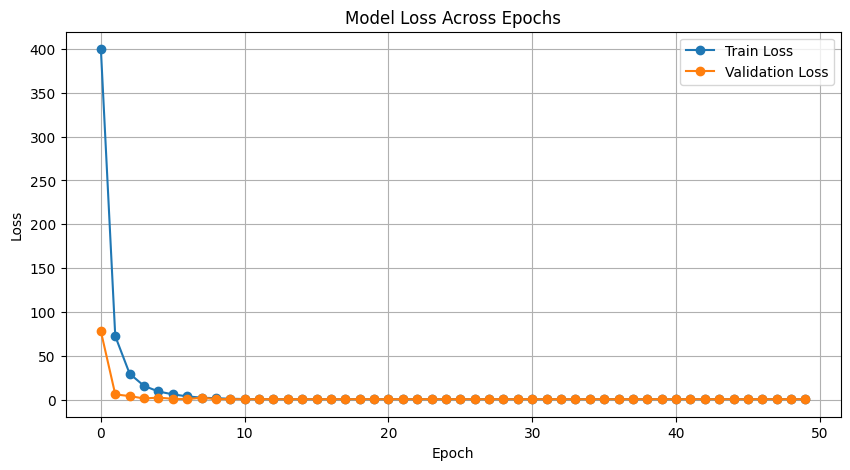

In [126]:
plt.figure(figsize=(10, 5))
plt.plot(history_5.history['loss'], 'o-', label='Train Loss')
plt.plot(history_5.history['val_loss'], 'o-', label='Validation Loss')
plt.title('Model Loss Across Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

#### Recall

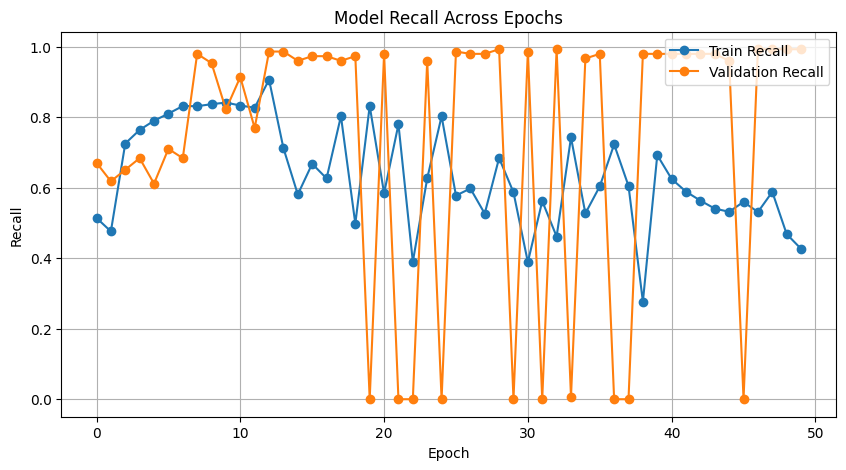

In [127]:
plt.figure(figsize=(10, 5))
plt.plot(history_5.history['recall'], 'o-', label='Train Recall')
plt.plot(history_5.history['val_recall'], 'o-', label='Validation Recall')
plt.title('Model Recall Across Epochs')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [128]:
y_train_pred = model_5.predict(X_train_smote)

# Predicting the results using 0.5 as the threshold

y_train_pred = (y_train_pred > 0.5)
y_train_pred

425/425 [==============================] - 0s 256us/step


array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [129]:
y_val_pred = model_5.predict(X_val)

# Predicting the results using 0.5 as the threshold

y_val_pred = (y_val_pred > 0.5)
y_val_pred

24/24 [==============================] - 0s 310us/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [130]:
model_name = "NN with SMOTE,Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

#### Classification Report

In [131]:
# Classification report

cr = classification_report(y_train_smote, y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.67      0.01      0.01      6791
           1       0.50      1.00      0.67      6791

    accuracy                           0.50     13582
   macro avg       0.58      0.50      0.34     13582
weighted avg       0.58      0.50      0.34     13582



In [132]:
# Classification report

cr = classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.50      0.00      0.00       598
           1       0.20      0.99      0.34       152

    accuracy                           0.20       750
   macro avg       0.35      0.50      0.17       750
weighted avg       0.44      0.20      0.07       750



#### Confusion Matrix

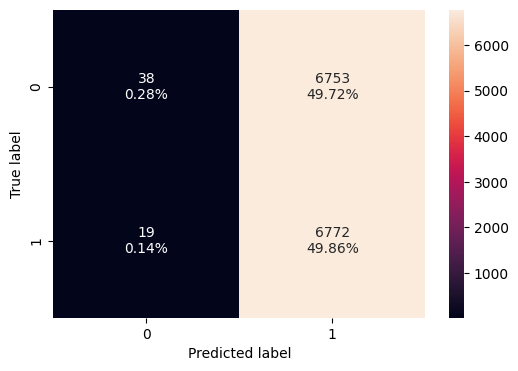

In [133]:
make_confusion_matrix(y_train_smote, y_train_pred)

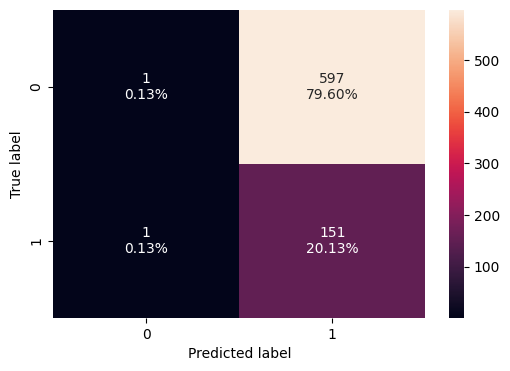

In [134]:
make_confusion_matrix(y_val, y_val_pred)

## Model Performance Comparison and Final Model Selection

In [135]:
print("Training performance comparison")
train_metric_df

Training performance comparison


,recall
NN with SGD,0.125805
NN with Adam,0.494441
NN with Adam & Dropout,0.372733
NN with SMOTE & SGD,1.000000
"NN with SMOTE,Adam & Dropout",0.997202


In [136]:
print("Validation set performance comparison")
valid_metric_df

Validation set performance comparison


,recall
NN with SGD,0.190789
NN with Adam,0.493421
NN with Adam & Dropout,0.407895
NN with SMOTE & SGD,1.000000
"NN with SMOTE,Adam & Dropout",0.993421


In [137]:
train_metric_df - valid_metric_df

,recall
NN with SGD,-0.064985
NN with Adam,0.001020
NN with Adam & Dropout,-0.035162
NN with SMOTE & SGD,0.000000
"NN with SMOTE,Adam & Dropout",0.003781


In [138]:
y_test_pred = model_5.predict(X_test)   
y_test_pred = (y_test_pred > 0.5)
print(y_test_pred)

24/24 [==============================] - 0s 320us/step
[[ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]


In [139]:
# Print classification report

cr=classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.01      0.02       574
           1       0.24      1.00      0.38       176

    accuracy                           0.24       750
   macro avg       0.62      0.50      0.20       750
weighted avg       0.82      0.24      0.10       750



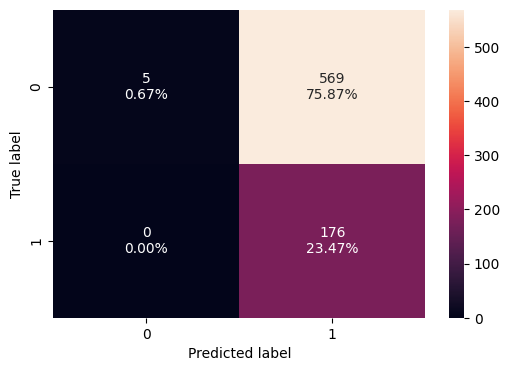

In [140]:
# Calculating the confusion matrix

make_confusion_matrix(y_test,y_test_pred)

## Actionable Insights and Business Recommendations

**Feature Engineering:**

Investigate creating interaction terms or polynomial features that might help in capturing non-linear relationships more effectively.

Consider more detailed segmentation of continuous variables, like salary or balance, using binning or categorization to capture nuances in customer behavior at different levels.

**Model Enhancements:**

Experiment with different architectures for the neural network, perhaps varying the number of layers or the number of neurons per layer.

Try using different activation functions to see if they affect model performance, especially in capturing complex patterns in the data.

**Advanced Techniques:**

Implement techniques like cross-validation during training to ensure the model's stability and robustness across different subsets of the data.

Explore advanced algorithms like Gradient Boosting or XGBoost, which may provide more predictive accuracy than neural networks.

**Targeted Customer Engagement:**

Develop personalized retention strategies based on the characteristics associated with high churn risk, such as low balances or single product usage.

**Product and Service Improvements:**

Enhance product offerings and customer service for segments identified as having higher churn, such as certain geographic areas or demographic groups.

**Customer Feedback:**

Regularly gather and analyze customer feedback, especially from those who churn, to continuously adapt and improve services.